In [1]:
# Import necessery packages

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import scikit_posthocs as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pingouin as pg
import plotly.express as px

In [2]:
dataset=pd.read_excel()

In [3]:
dataset=dataset.rename(columns={'UWES                     suma zaangażowania':'UWES_Suma','BAT                           suma wypalenia':'BAT_Suma'})

In [4]:
# Check dataset sample

dataset.sample(2)

,Grupa,płeć,wiek,miejsce zamieszkania,wykształcenie,staż pracy,rodzina,zaległy urlop,Wigor,Poświęcenie,...,UWES_Suma,UWES wynik,wyczerpanie,zdystansowanie psychiczne,funkcjonowanie poznawcze,funkcjonowanie emocjonalne,objawy psychologiczne,objawy psychosomatyczne,BAT_Suma,BAT wynik
101,1,1,3,wieś,średnie,6,tak,4,16,10,...,40,2.352941,28,15,10,10,14,18,95,2.878788
2,2,1,4,miasto,średnie,6,tak,0,31,27,...,81,4.764706,15,6,5,5,8,6,45,1.363636


In [5]:
# Check number of samples for each group

dataset.groupby('Grupa').count()

,płeć,wiek,miejsce zamieszkania,wykształcenie,staż pracy,rodzina,zaległy urlop,Wigor,Poświęcenie,Absorbcja,UWES_Suma,UWES wynik,wyczerpanie,zdystansowanie psychiczne,funkcjonowanie poznawcze,funkcjonowanie emocjonalne,objawy psychologiczne,objawy psychosomatyczne,BAT_Suma,BAT wynik
Grupa,,,,,,,,,,,,,,,,,,,,
1,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
2,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
3,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
4,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30


In [6]:
# Select important collumns

dataset=dataset[['Grupa','UWES_Suma','BAT_Suma','zaległy urlop','staż pracy','płeć']]

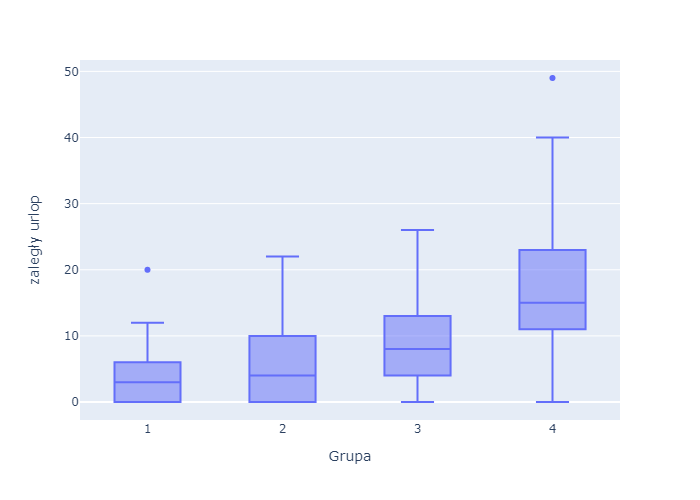

In [7]:
# Check if outliers are detected

fig = px.box(dataset, x="Grupa", y="zaległy urlop")
fig.show("png")

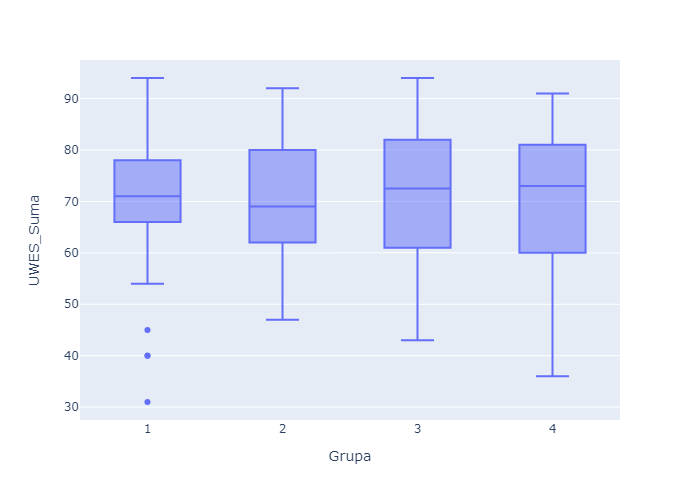

In [8]:
fig2 = px.box(dataset,x="Grupa", y="UWES_Suma")
fig2.show("png")

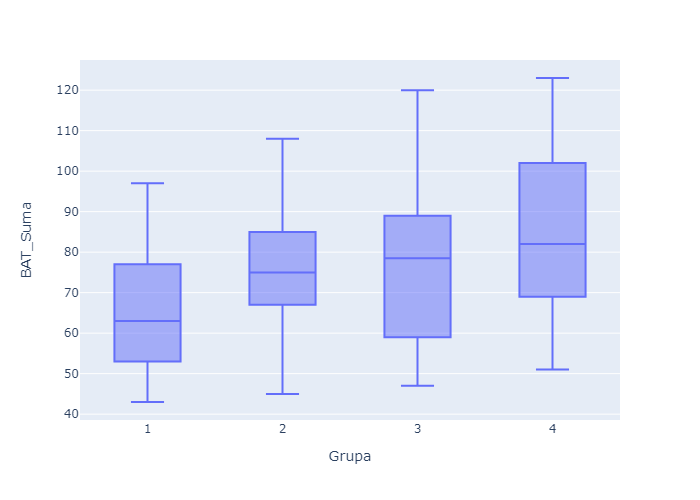

In [9]:
fig3 = px.box(dataset,x="Grupa", y="BAT_Suma")
fig3.show("png")

In [10]:
# Remove outliers

outliers=dataset.query('UWES_Suma == 45 | UWES_Suma ==40 | UWES_Suma == 31')
dataset_updated=dataset.drop(outliers.index)

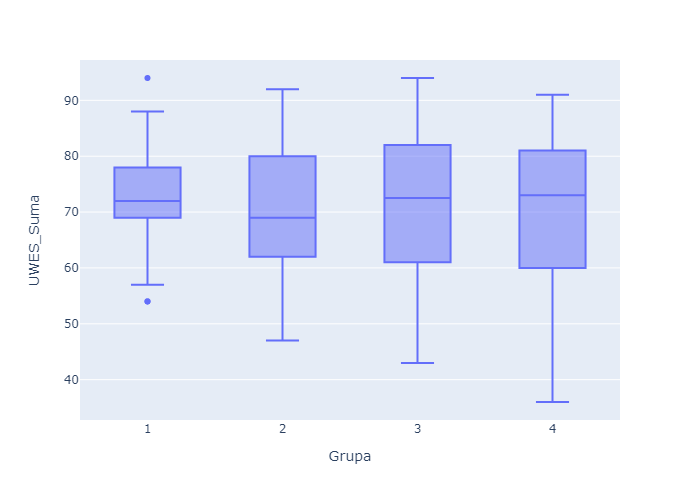

In [11]:
fig4 = px.box(dataset_updated,x="Grupa", y="UWES_Suma")
fig4.show("png")

In [12]:
outliers2=dataset.query('UWES_Suma == 54 | UWES_Suma ==94')
dataset_updated=dataset_updated.drop(outliers2.index)

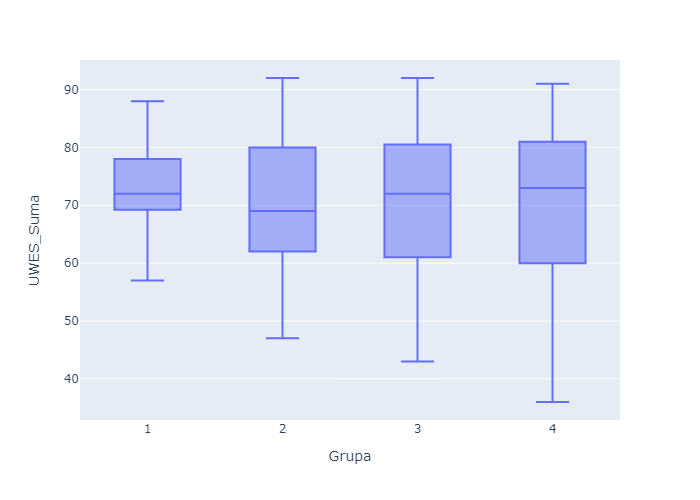

In [13]:
fig5 = px.box(dataset_updated,x="Grupa", y="UWES_Suma")
fig5.show("png")

0.0020440833177417517

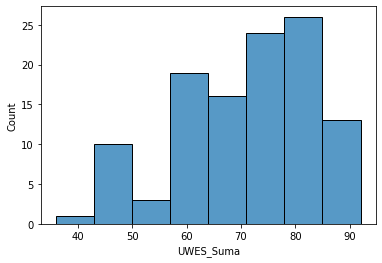

In [14]:
# Check if the distribution is normal using Shapiro-Wilk test

sns.histplot(data=dataset_updated, x="UWES_Suma")
shapiro_test = stats.shapiro(dataset_updated['UWES_Suma'])
shapiro_test.pvalue

P_value of S-W test for this column equals:0.028651410713791847


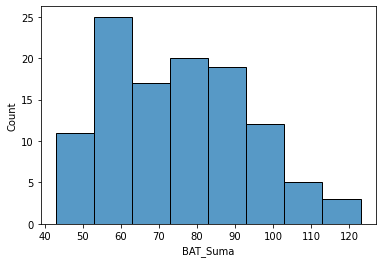

In [15]:
sns.histplot(data=dataset_updated, x="BAT_Suma")
shapiro_test = stats.shapiro(dataset_updated['BAT_Suma'])
print('P_value of S-W test for this column equals:' + str(shapiro_test.pvalue))

P_value of S-W test for this column equals:7.2847554655197655e-09


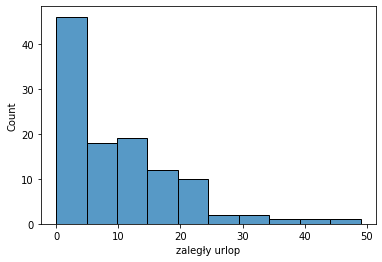

In [16]:
sns.histplot(data=dataset_updated, x="zaległy urlop")
shapiro_test = stats.shapiro(dataset_updated['zaległy urlop'])
print('P_value of S-W test for this column equals:' + str(shapiro_test.pvalue))

In [17]:
# Calculate simple statistics

dataset.groupby(['Grupa']).agg(['mean', 'sum'])

UWES_Suma         BAT_Suma       zaległy urlop      staż pracy       \
            mean   sum       mean   sum          mean  sum       mean  sum   
Grupa                                                                        
1      68.333333  2050  66.666667  2000      4.200000  126        3.6  108   
2      69.866667  2096  75.800000  2274      5.966667  179        4.2  126   
3      71.966667  2159  77.233333  2317      8.733333  262        3.1   93   
4      68.133333  2044  82.733333  2482     17.733333  532        4.0  120   

           płeć      
           mean sum  
Grupa                
1      1.033333  31  
2      1.100000  33  
3      1.500000  45  
4      1.366667  41

In [18]:
# Compare four groups with non-gaussian distributions using Kruskall-Wallis Test

KW_Test= stats.kruskal(dataset_updated.query('Grupa==1')['BAT_Suma'],dataset_updated.query('Grupa==2')['BAT_Suma'],dataset_updated.query('Grupa==3')['BAT_Suma'],dataset_updated.query('Grupa==4')['BAT_Suma'])
KW_Test2= stats.kruskal(dataset_updated.query('Grupa==1')['UWES_Suma'],dataset_updated.query('Grupa==2')['UWES_Suma'],dataset_updated.query('Grupa==3')['UWES_Suma'],dataset_updated.query('Grupa==4')['UWES_Suma'])
print('K-W Test result for UWES is:' + str(KW_Test[0]) + 'and p-value equals:' + 5*'*'+ str(KW_Test2[1])+ 5*'*')
print('K-W Test result for BAT is:' + str(KW_Test[0]) + 'and p-value equals:' + 5*'*'+ str(KW_Test[1])+ 5*'*')

K-W Test result for UWES is:17.743906439355026and p-value equals:*****0.8588250906304957*****
K-W Test result for BAT is:17.743906439355026and p-value equals:*****0.0004967103175261765*****


In [19]:
g1=dataset.query('Grupa==1')['BAT_Suma'].values
g2=dataset.query('Grupa==2')['BAT_Suma'].values
g3=dataset.query('Grupa==3')['BAT_Suma'].values
g4=dataset.query('Grupa==4')['BAT_Suma'].values
groups=[g1,g2,g3,g4]

In [20]:
# Calculate Post-Hoc Tests using Bonferroni correction  

sp.posthoc_dunn(groups, p_adjust = 'bonferroni')

,1,2,3,4
1,1.000000,0.252449,0.239242,0.006263
2,0.252449,1.000000,1.000000,1.000000
3,0.239242,1.000000,1.000000,1.000000
4,0.006263,1.000000,1.000000,1.000000


In [21]:
# Calculate ranks

rank_g1=pd.DataFrame(dataset_updated.query('Grupa==1')['BAT_Suma'].rank()).astype(int).reset_index()
rank_g4=dataset_updated.query('Grupa==4')['BAT_Suma'].rank().astype(int).reset_index()
rank_g1.set_index('index')
del rank_g1['index']
rank_g4.set_index('index')
del rank_g4['index']

In [22]:
rank_g1=rank_g1.rename(columns={'BAT_Suma':'BAT Suma Pracownicy fizyczni'})
rank_g4=rank_g4.rename(columns={'BAT_Suma':'BAT Suma Kadra Medenżerska'})
dataset_ranks=rank_g1.join(rank_g4)


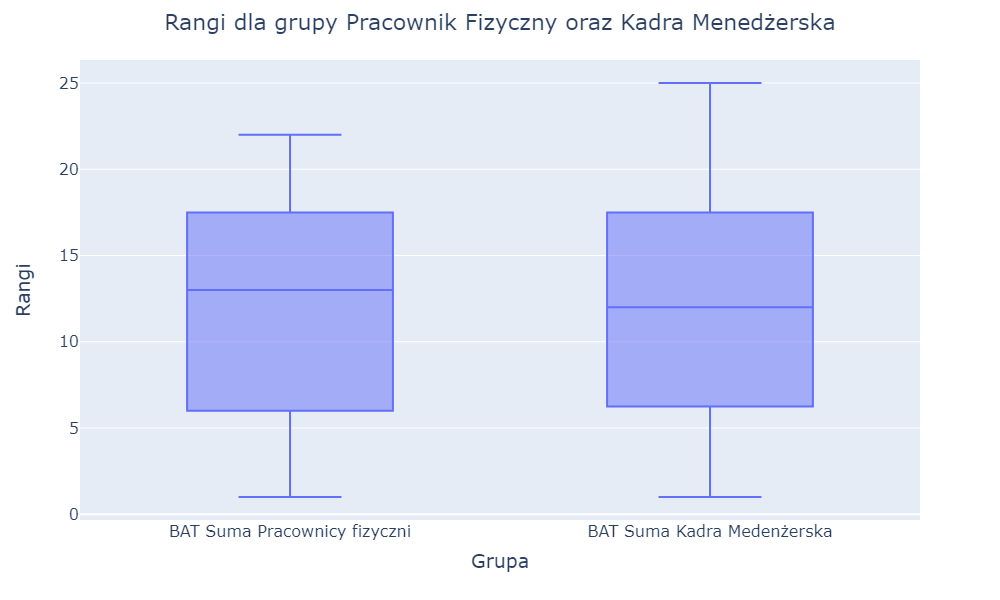

In [23]:
# Plot ranks from both groups with significant differences

fig6 = px.box(dataset_ranks,y=dataset_ranks.columns,
                 width=1000, height=600)
fig6.update_layout(title_text='Rangi dla grupy Pracownik Fizyczny oraz Kadra Menedżerska', title_x=0.5)

fig6.update_layout(
    xaxis_title="Grupa",
    yaxis_title="Rangi",
    font=dict(
        size=16,    )
)

fig6.show("png")

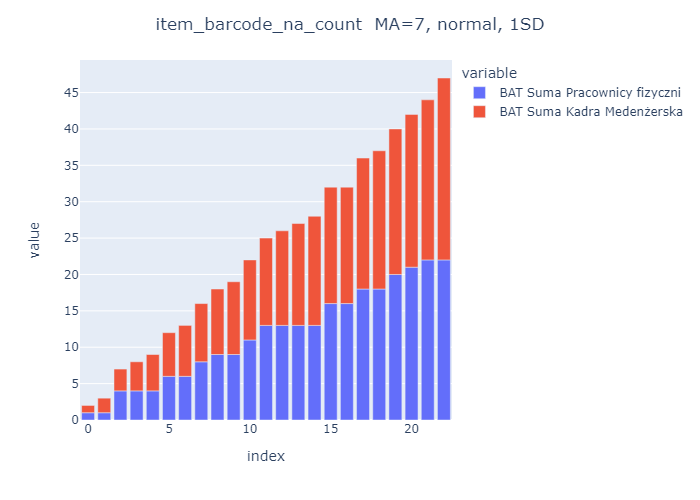

In [24]:
fig7 = px.bar(dataset_ranks, x= dataset_ranks.index,y=dataset_ranks.columns)
fig7.update_layout(title_text='item_barcode_na_count  MA=7, normal, 1SD', title_x=0.5)
fig7.show("png")

In [25]:
# Prepare data for partial correlation analysis

G1=dataset_updated.query('Grupa==1')[['UWES_Suma','BAT_Suma','zaległy urlop']]
G2=dataset_updated.query('Grupa==2')[['UWES_Suma','BAT_Suma','zaległy urlop']]
G3=dataset_updated.query('Grupa==3')[['UWES_Suma','BAT_Suma','zaległy urlop']]
G4=dataset_updated.query('Grupa==4')[['UWES_Suma','BAT_Suma','zaległy urlop']]

In [26]:
# Calculate partial correlation with number of overdue holiday days as a covariate  

partial_corr=pg.partial_corr(G1, 'UWES_Suma', 'BAT_Suma', 'zaległy urlop',method='pearson')
print(f'Partial Correlation for G1\n'+str(partial_corr))
partial_corr=pg.partial_corr(G2, 'UWES_Suma', 'BAT_Suma', 'zaległy urlop',method='pearson')
print(f'Partial Correlation for G2\n'+str(partial_corr))
partial_corr=pg.partial_corr(G3, 'UWES_Suma', 'BAT_Suma', 'zaległy urlop',method='pearson')
print(f'Partial Correlation for G3\n'+str(partial_corr))
partial_corr=pg.partial_corr(G4, 'UWES_Suma', 'BAT_Suma', 'zaległy urlop',method='pearson')
print(f'Partial Correlation for G4\n'+str(partial_corr))


Partial Correlation for G1
          n         r       CI95%     p-val
pearson  23  0.576348  [0.2, 0.8]  0.004993
Partial Correlation for G2
          n         r          CI95%     p-val
pearson  30 -0.225175  [-0.55, 0.15]  0.240227
Partial Correlation for G3
          n         r          CI95%     p-val
pearson  29  0.207161  [-0.18, 0.54]  0.290173
Partial Correlation for G4
          n         r          CI95%     p-val
pearson  30 -0.062154  [-0.42, 0.31]  0.748742


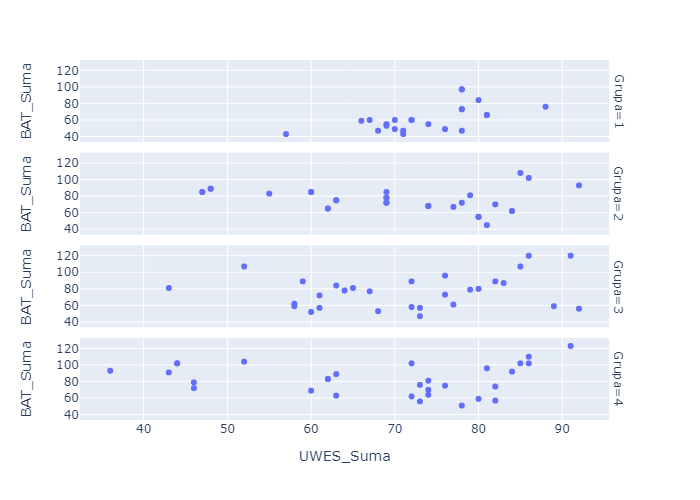

In [27]:
fig8 = px.scatter(dataset_updated, x="UWES_Suma", y="BAT_Suma", facet_row="Grupa")
fig8.show("png")

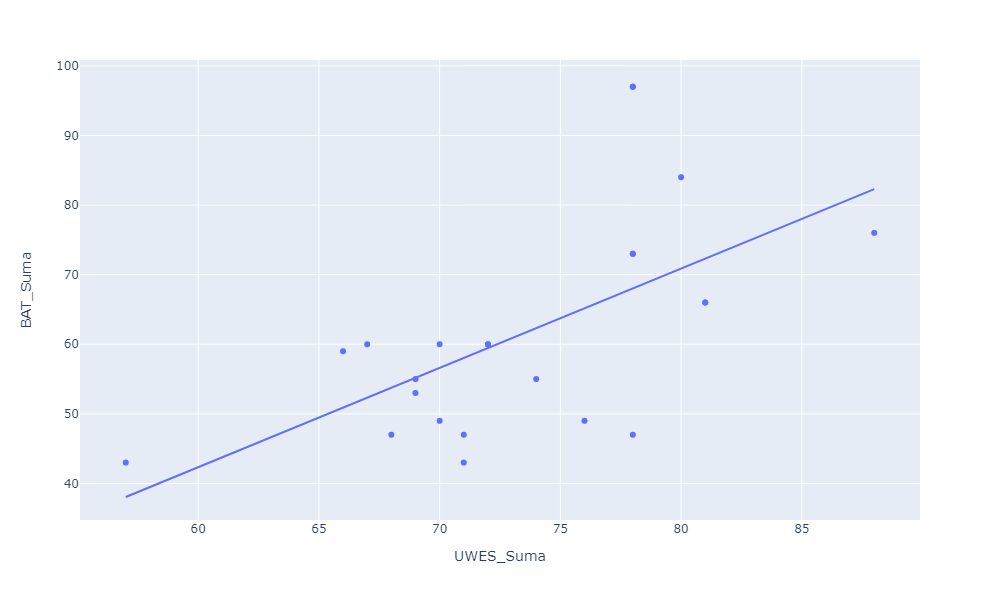

In [28]:
# Visulize the differences with Ordinary Least Squares regression trendline

fig9 = px.scatter(dataset_updated.query('Grupa==1'), x="UWES_Suma", y="BAT_Suma",trendline="ols", width=1000, height=600)
fig9.show("png")